## 0. Ambiente Computacional

In [14]:
import os
import pandas as pd
import numpy as np

from utils import load_csv_files
from utils import checar_cols
from utils import comparar_colunas
from utils import verificar_ordem_colunas
from utils import plot_data
from utils import valores_miss_nulls_cols

## 1. Pré processamento (parte 2)

Um pré processamento já foi aplicado usando [preprocessing](./preprocessing.py). 

Agora se faz necessário checar a integridade de cada arquivo. 

__Os seguintes tópicos serão abordados nesta fase:__

1. Qual o tipo de dados nas colunas após a limpeza?
* As colunas permanecem consistentes após a etapa de limpeza?
* É possível estabelecer um número mínimo de colunas para todos os anos?

2. Tratamento dos valores faltantes/nulos nas colunas restantes:
* Qual será o tipo de abordagem para esses valores?

### 1.1 Padronização dos nomes das colunas

In [15]:
# Carrega os dataframes já pré-processados.
file_paths = ['../data/preprocessed_files/2017/2017.csv',
              '../data/preprocessed_files/2018/2018.csv',
              '../data/preprocessed_files/2019/2019.csv',
              '../data/preprocessed_files/2020/2020.csv',
              '../data/preprocessed_files/2021/2021.csv',]

dfs = load_csv_files(file_paths=file_paths)

In [16]:
checar_cols(dfs=dfs)

2017/2018: 

Todos os nomes de colunas são iguais.

2017/2019: 

Colunas que não são iguais: 

- Se você tem um distúrbio de saúde mental, com que frequência sente que isso interfere no seu trabalho quando não é tratado de maneira eficaz (ou seja, quando você está experimentando sintomas)?: Encontrada no df2, mas não no df1 

- Se você tem um distúrbio de saúde mental, com que frequência sente que isso interfere no seu trabalho quando não é tratado de maneira eficaz (ou seja, quando está experimentando sintomas)?: Encontrada no df1, mas não no df2 

- Se eles soubessem que você sofria de um distúrbio de saúde mental, como você acha que os membros da sua equipe/colegas de trabalho reagiriam?: Encontrada no df2, mas não no df1 

- Você estaria disposto a conversar com um de nós mais extensivamente sobre suas experiências com problemas de saúde mental no setor de tecnologia?(Observe que todas as respostas da entrevista seriam usadas anonimamente e apenas com sua permissão.): Encontrada no

Nota-se que apenas os anos de 2017 e 2018 que estão com poucas palavras trocadas. Possivelmente dada a tradução. 

Ajeitando:

In [17]:
cols_rename = {"Se você tem um distúrbio de saúde mental, com que frequência sente que isso interfere no seu trabalho quando não é tratado de maneira eficaz (ou seja, quando está experimentando sintomas)?":
                  "Se você tem um distúrbio de saúde mental, com que frequência sente que isso interfere no seu trabalho quando não é tratado de maneira eficaz (ou seja, quando você está experimentando sintomas)?",
                  "Se eles soubessem que você sofria de um distúrbio de saúde mental, como você acha que os membros da equipe/colegas de trabalho reagiriam?":
                  "Se eles soubessem que você sofria de um distúrbio de saúde mental, como você acha que os membros da sua equipe/colegas de trabalho reagiriam?",
                  "Você estaria disposto a conversar com um de nós mais extensivamente sobre suas experiências com problemas de saúde mental no setor de tecnologia?(Observe que todas as respostas da entrevista seriam usadas anonimamente e apenas com sua permissão.)":
                  "Você estaria disposto a conversar com um de nós mais extensivamente sobre suas experiências com problemas de saúde mental no setor de tecnologia?(Observe que todas as respostas da entrevista seriam usadas _Anonymly_ e somente com sua permissão.)"}

# Refere-se ao df de 2018
dfs[0].rename(columns=cols_rename, inplace=True)
dfs[1].rename(columns=cols_rename, inplace=True)

In [18]:
# Checando novamente
checar_cols(dfs)

2017/2018: 

Todos os nomes de colunas são iguais.

2017/2019: 

Todos os nomes de colunas são iguais.

2017/2020: 

Todos os nomes de colunas são iguais.

2017/2021: 

Todos os nomes de colunas são iguais.

2018/2019: 

Todos os nomes de colunas são iguais.

2018/2020: 

Todos os nomes de colunas são iguais.

2018/2021: 

Todos os nomes de colunas são iguais.

2019/2020: 

Todos os nomes de colunas são iguais.

2019/2021: 

Todos os nomes de colunas são iguais.

2020/2021: 

Todos os nomes de colunas são iguais.



Agora é preciso verificar a ordem das colunas.

In [19]:
ordem_cols = verificar_ordem_colunas(dfs)
if ordem_cols:
    print('As colunas estão ordenadas.')

As colunas estão ordenadas.


Por fim, verificando as seguintes informações sobre os dados:
* Número de participantes por ano
* Número de colunas por ano

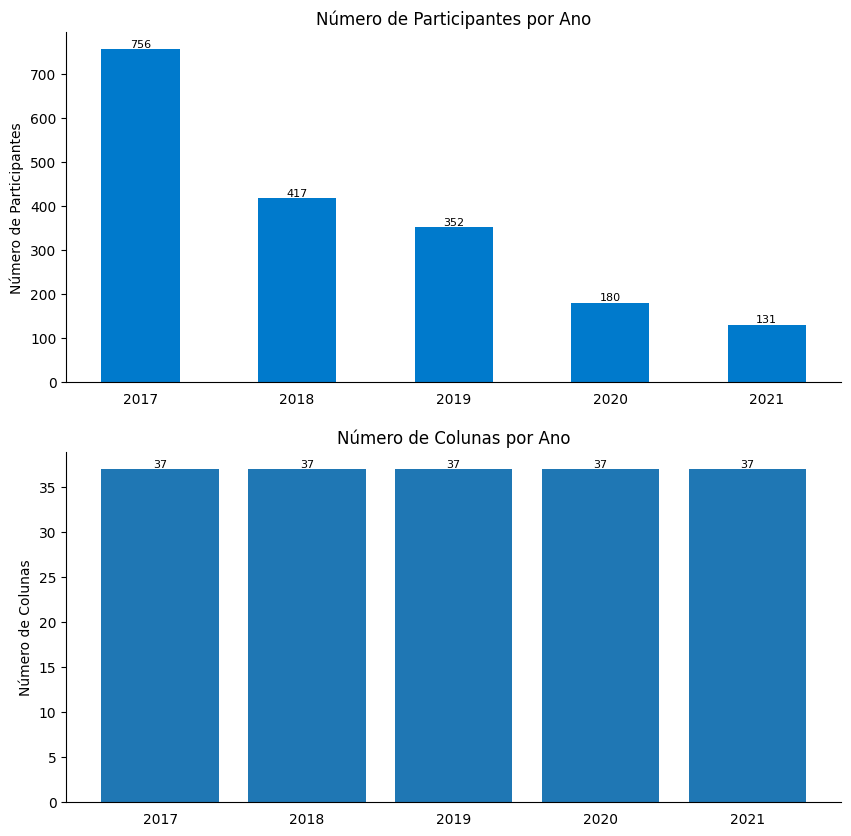

In [20]:
output_path = 'informacoes_gerais.png'
plot_data(dfs, output_path)

__O conjunto de arquivos está pronto para a próxima fase, pois as colunas estão padronizadas.__

### 1.2 Juntando os dados em um dataframe único

Considerando que os arquivos estejam padronizados, é possível criar um único dataframe. No entanto, para evitar perda de informação, o ano será adicionado aos arquivos antes de serem mesclados.

O ano pode ser utilizado como uma feature no treinamento do modelo. Referência: [link](https://towardsdatascience.com/make-your-machine-learning-model-work-better-with-datetime-features-eb21de397fe8)

Como sabemos, a pandemia de COVID-19 afetou a saúde mental de muitas pessoas. Logo, talvez vejamos efeitos disso no modelo. É preciso, primeiro, analisar a consistência dos dados.

In [21]:
for i, df in enumerate(dfs):
    year = 2017 + i
    df['Ano'] = year
    df['Ano'] = pd.to_datetime(df['Ano'], format='%Y')

In [22]:
# Concatenando os dataframes em um só
merged_df = pd.concat(dfs, ignore_index=True)

# Salvando o novo dataframe
output_dir = '../data/preprocessed_files/all_years'
os.makedirs(output_dir, exist_ok=True)
output_file = os.path.join(output_dir, 'mental_health.csv')
merged_df.to_csv(output_file, index=False) 

### 1.3 Analisando o conteúdo das colunas

Existem duas colunas que possuem conteúdo que são de discurso livre:

* Descreva brevemente o que você acha que o setor como um todo e/ou empregadores poderia fazer para melhorar o apoio à saúde mental aos funcionários.
* Você estaria disposto a conversar com um de nós mais extensivamente sobre suas experiências com problemas de saúde mental no setor de tecnologia?(Observe que todas as respostas da entrevista seriam usadas _Anonymly_ e somente com sua permissão.).

A primeira será reservada em um dataframe específico para usar em Processamento de de Linguagem Natural (NLP).
A segunda será excluída por não contribuir para a análise.

In [23]:
import os
import pandas as pd

# Carregando a base única dos dados
df = pd.read_csv('../data/preprocessed_files/all_years/mental_health.csv')

# Reservando o texto
output_dir = '../data/nlp/'
os.makedirs(output_dir, exist_ok=True)
output_file = os.path.join(output_dir, 'mental_health_text.csv')
df_text = df['Descreva brevemente o que você acha que o setor como um todo e/ou empregadores poderia fazer para melhorar o apoio à saúde mental aos funcionários.']
df_text.dropna(inplace=True)
df_text.to_csv(output_file, index=False)

# Removendo a coluna
df.drop(columns='Você estaria disposto a conversar com um de nós mais extensivamente sobre suas experiências com problemas de saúde mental no setor de tecnologia?(Observe que todas as respostas da entrevista seriam usadas _Anonymly_ e somente com sua permissão.)', inplace=True)


In [33]:
merged_df['Você estaria disposto a conversar com um de nós mais extensivamente sobre suas experiências com problemas de saúde mental no setor de tecnologia?(Observe que todas as respostas da entrevista seriam usadas _Anonymly_ e somente com sua permissão.)']

0       0
1       0
2       1
3       0
4       1
       ..
1831    1
1832    0
1833    1
1834    1
1835    0
Name: Você estaria disposto a conversar com um de nós mais extensivamente sobre suas experiências com problemas de saúde mental no setor de tecnologia?(Observe que todas as respostas da entrevista seriam usadas _Anonymly_ e somente com sua permissão.), Length: 1836, dtype: object

In [36]:
import os
import sys
import pandas as pd

from utils import load_csv_files, plot_data

def rename_columns(dfs):
    try:
        cols_rename = {
            "Se você tem um distúrbio de saúde mental, com que frequência sente que isso interfere no seu trabalho quando não é tratado de maneira eficaz (ou seja, quando está experimentando sintomas)?":
            "Se você tem um distúrbio de saúde mental, com que frequência sente que isso interfere no seu trabalho quando não é tratado de maneira eficaz (ou seja, quando você está experimentando sintomas)?",
            "Se eles soubessem que você sofria de um distúrbio de saúde mental, como você acha que os membros da equipe/colegas de trabalho reagiriam?":
            "Se eles soubessem que você sofria de um distúrbio de saúde mental, como você acha que os membros da sua equipe/colegas de trabalho reagiriam?",
            "Você estaria disposto a conversar com um de nós mais extensivamente sobre suas experiências com problemas de saúde mental no setor de tecnologia?(Observe que todas as respostas da entrevista seriam usadas anonimamente e apenas com sua permissão.)":
            "Você estaria disposto a conversar com um de nós mais extensivamente sobre suas experiências com problemas de saúde mental no setor de tecnologia?(Observe que todas as respostas da entrevista seriam usadas _Anonymly_ e somente com sua permissão.)"
        }

        for df in dfs[:2]:  # Apenas para os dois primeiros dataframes (2017 e 2018)
            df.rename(columns=cols_rename, inplace=True)
        return dfs

    except Exception as e:
        # Tratamento de erros
        print(f"Erro ao renomear colunas: {str(e)}")
        raise

def add_year_column(dfs):
    try:
        for i, df in enumerate(dfs):
            year = 2017 + i
            df['Ano'] = year
            df['Ano'] = pd.to_datetime(df['Ano'], format='%Y')
        
        return dfs

    except Exception as e:
        # Tratamento de erros
        print(f"Erro ao adicionar coluna de ano: {str(e)}")
        raise

def save_merged_dataframe(merged_df, output_dir):
    try:
        os.makedirs(output_dir, exist_ok=True)
        output_file = os.path.join(output_dir, 'mental_health.csv')
        merged_df.to_csv(output_file, index=False)

    except Exception as e:
        # Tratamento de erros
        print(f"Erro ao salvar o dataframe mesclado: {str(e)}")
        raise

def save_text_dataframe(df_text, output_dir):
    try:
        os.makedirs(output_dir, exist_ok=True)
        output_file = os.path.join(output_dir, 'mental_health_text.csv')
        df_text.to_csv(output_file, index=False)

    except Exception as e:
        # Tratamento de erros
        print(f"Erro ao salvar o dataframe de texto: {str(e)}")
        raise

def process_data():
    try:
        # Carrega os dataframes já pré-processados na parte 1
        file_paths = ['../data/preprocessed_files/2017/2017.csv',
                      '../data/preprocessed_files/2018/2018.csv',
                      '../data/preprocessed_files/2019/2019.csv',
                      '../data/preprocessed_files/2020/2020.csv',
                      '../data/preprocessed_files/2021/2021.csv']
        dfs = load_csv_files(file_paths=file_paths)

        # Renomear colunas
        dfs = rename_columns(dfs)

        # Salvar as informações gerais das colunas recém-padronizadas
        output_path = 'informacoes_gerais.png'
        plot_data(dfs, output_path)

        # Adicionar coluna 'Ano'
        dfs = add_year_column(dfs)

        # Concatenando os dataframes em um só
        merged_df = pd.concat(dfs, ignore_index=True)

        # Remover coluna referente ao contato com a empresa de pesquisas
        merged_df.drop(columns='Você estaria disposto a conversar com um de nós mais extensivamente sobre suas experiências com problemas de saúde mental no setor de tecnologia?(Observe que todas as respostas da entrevista seriam usadas _Anonymly_ e somente com sua permissão.)', inplace=True)

        # Salvar o novo dataframe
        output_dir = '../data/preprocessed_files/all_years'
        save_merged_dataframe(merged_df, output_dir)

        # Reservar o texto para análise NLP
        df_text = merged_df['Descreva brevemente o que você acha que o setor como um todo e/ou empregadores poderia fazer para melhorar o apoio à saúde mental aos funcionários.']
        df_text.dropna(inplace=True)

        output_dir = '../data/nlp/'
        save_text_dataframe(df_text, output_dir)


    except Exception as e:
        # Tratamento de erros
        print(f"Ocorreu um erro durante o processamento dos dados: {str(e)}")
        return None

    print("Processamento dos dados concluído com sucesso!")


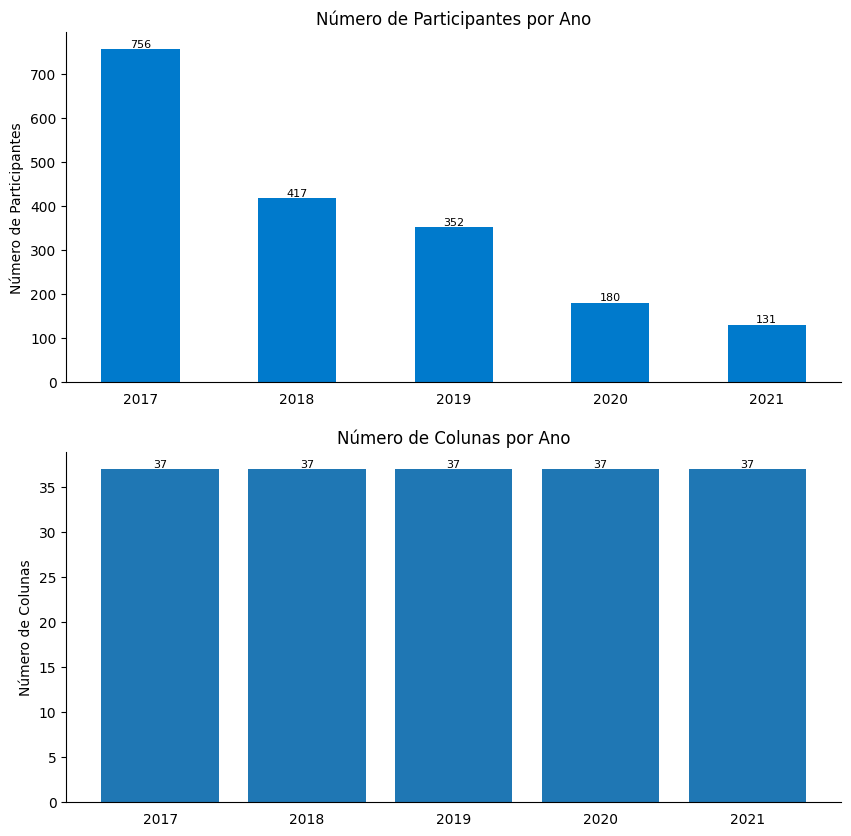

Processamento dos dados concluído com sucesso!


In [37]:
process_data()